In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
student_data = pd.read_csv("C:/Users/suhai/Downloads/student_extended_ml_dataset2.csv")


In [6]:
print(student_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5000 non-null   object 
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   object 
 3   Hours_Studied      5000 non-null   float64
 4   IQ                 5000 non-null   int64  
 5   Physics_Marks      5000 non-null   int64  
 6   Math_Marks         5000 non-null   int64  
 7   Chemistry_Marks    5000 non-null   int64  
 8   Has_Part_Time_Job  5000 non-null   bool   
 9   Study_Hours_Group  5000 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 356.6+ KB
None


In [7]:
print(student_data.describe())


               Age  Hours_Studied           IQ  Physics_Marks   Math_Marks  \
count  5000.000000    5000.000000  5000.000000    5000.000000  5000.000000   
mean     31.444800       5.499279   114.915200      70.311000    69.816000   
std       8.148388       2.588333    20.551839      17.753538    17.536626   
min      18.000000       1.002452    80.000000      40.000000    40.000000   
25%      24.000000       3.258910    97.000000      55.000000    54.000000   
50%      32.000000       5.474256   115.000000      71.000000    70.000000   
75%      38.000000       7.726088   133.000000      86.000000    85.000000   
max      45.000000       9.999925   150.000000     100.000000   100.000000   

       Chemistry_Marks  
count      5000.000000  
mean         69.798800  
std          17.487913  
min          40.000000  
25%          55.000000  
50%          70.000000  
75%          85.000000  
max         100.000000  


c:\Users\suhai\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


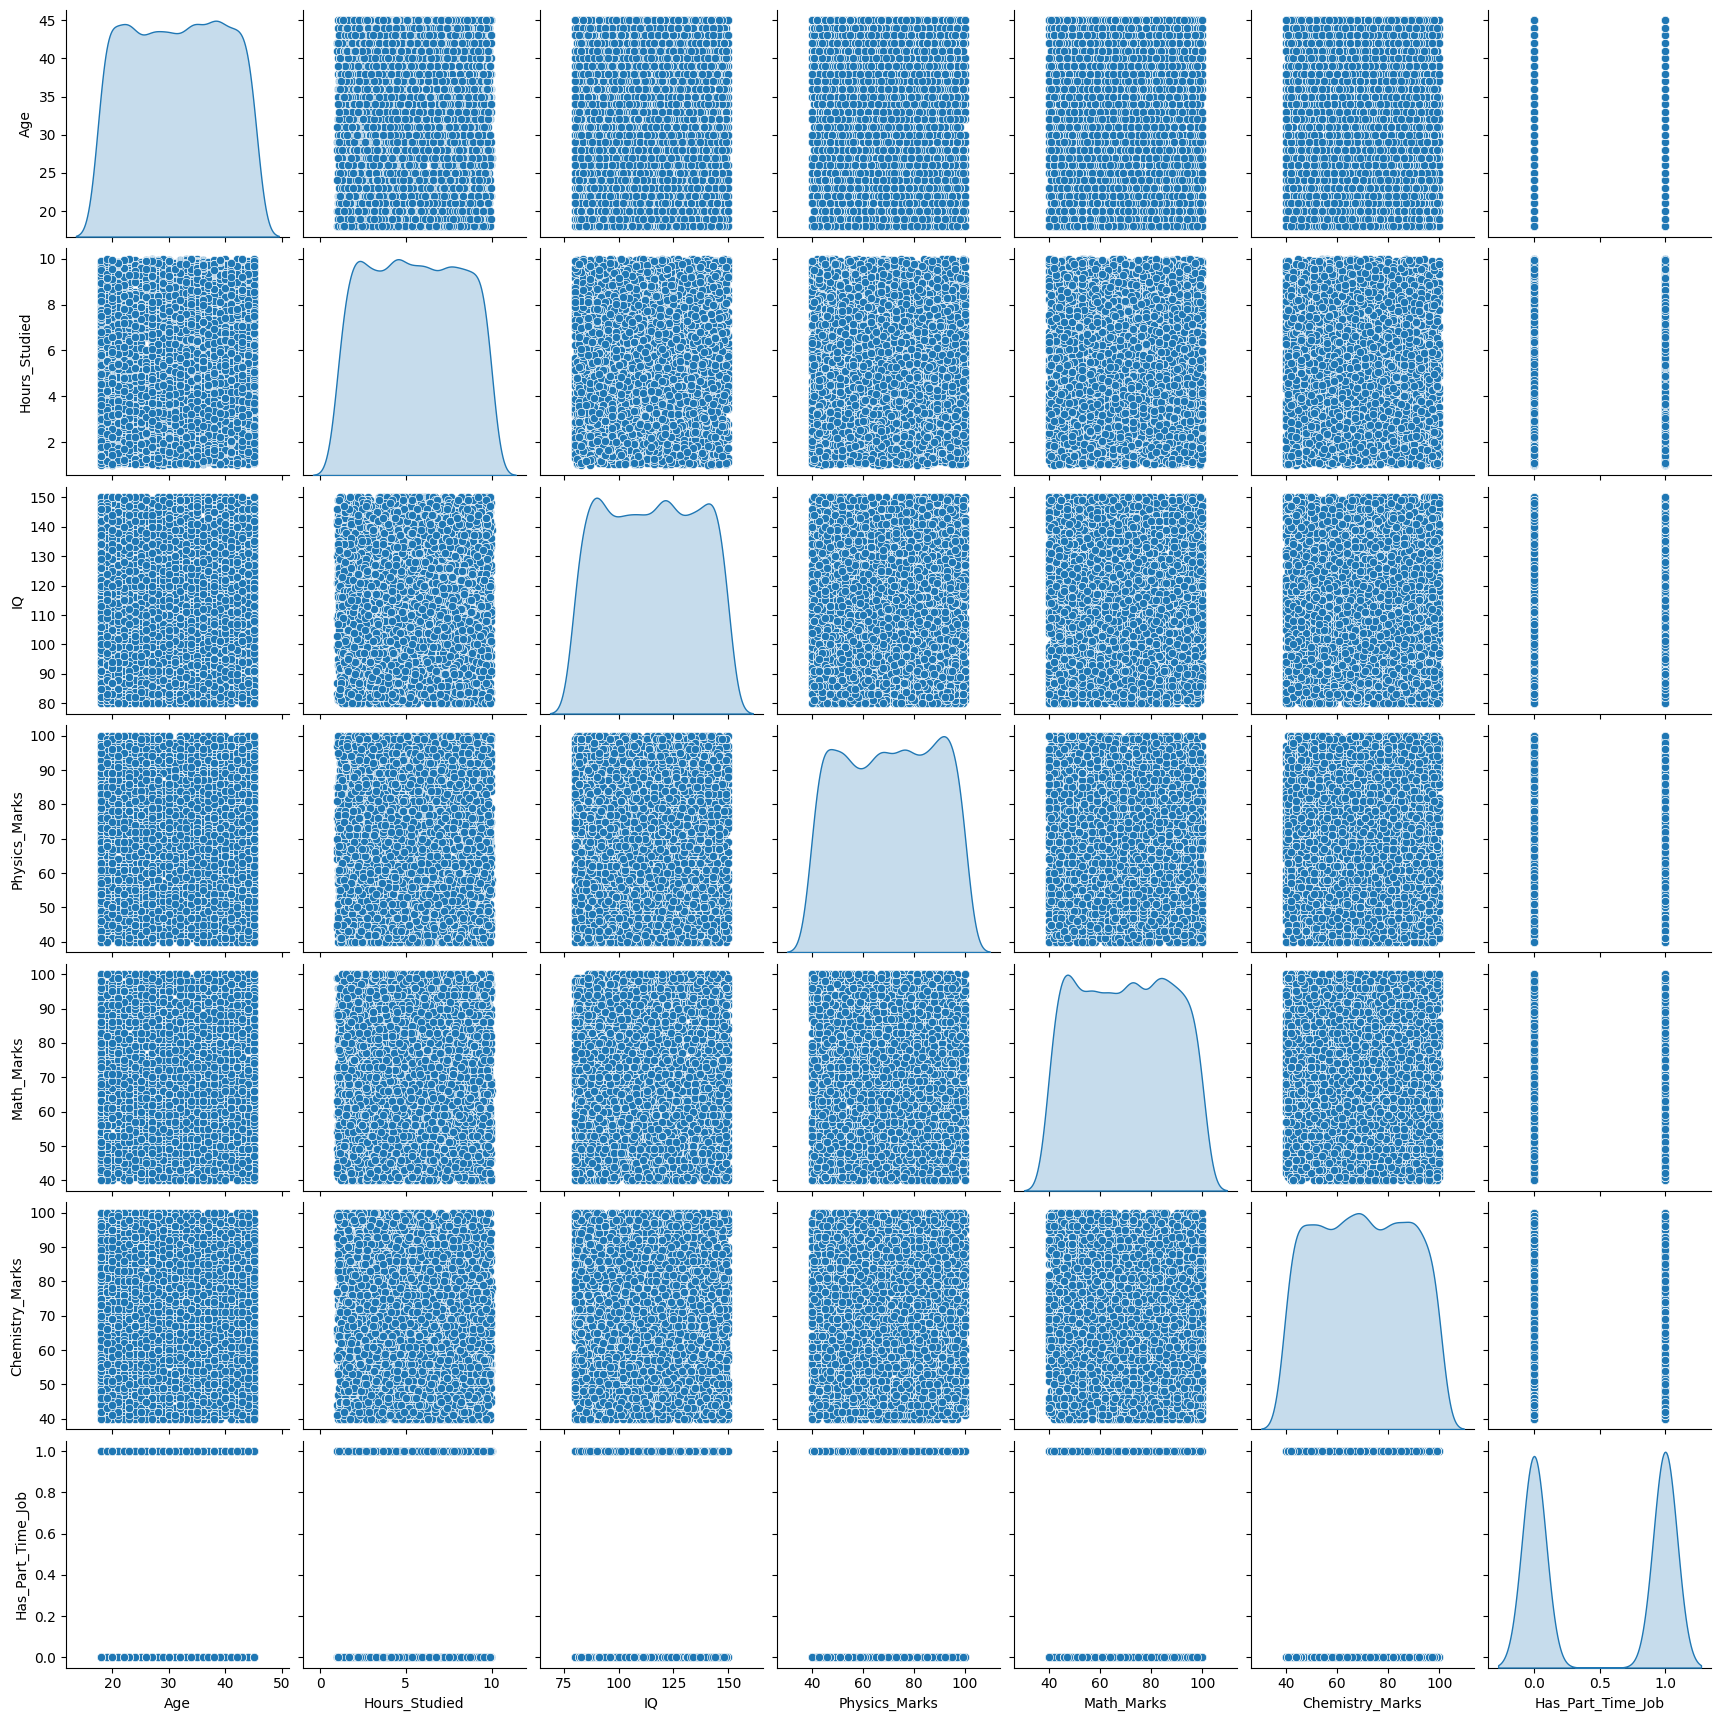

In [8]:
sns.pairplot(student_data, diag_kind='kde')
plt.show()

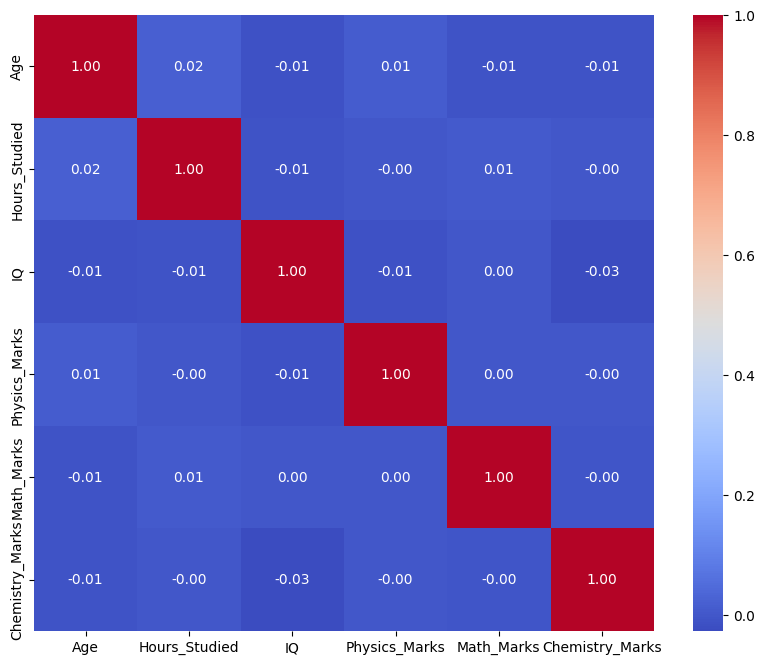

In [9]:
numeric_columns = student_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()






In [10]:
target_variable = input("Enter the target variable: ")


# Check if the entered target variable exists in the DataFrame
if target_variable not in student_data.columns:
    print("Invalid target variable. Please choose a valid column name from the dataset.")
else:
    # Define predictor variables
    predictor_variables = ['Age', 'Hours_Studied', 'IQ', 'Physics_Marks', 'Chemistry_Marks']


In [16]:
X = student_data[predictor_variables]
y = student_data[target_variable]

    # Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
model = LinearRegression()

    # Train the model
model.fit(X_train, y_train)

    # Make predictions on the test set
y_pred = model.predict(X_test)

    # Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [20]:
 
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')


Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00


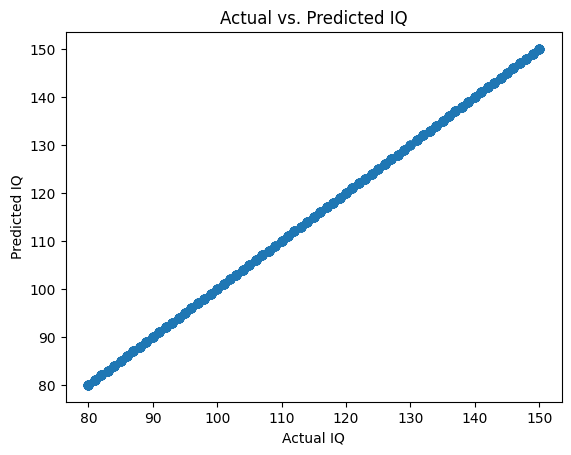

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel(f'Actual {target_variable}')
plt.ylabel(f'Predicted {target_variable}')
plt.title(f'Actual vs. Predicted {target_variable}')
plt.show()